In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pymc3 as pm

In [77]:
N_samples = [30, 30, 30]
G_samples = [18, 3, 3]

group_idx = np.repeat(np.arange(len(N_samples)),  N_samples)
data = []

for i in range(0, len(N_samples)):
    #print(data)
    data.extend(np.repeat([1,0], (G_samples[i], N_samples[i]-G_samples[i])))
#print(data)

Lets model this as :
$$ \alpha \sim HalfCauchy(\beta_{\alpha}) $$
$$ \beta \sim HalfCauchy(\beta_{\beta}) $$
$$ \theta \sim Beta(\alpha, \beta) $$ 
$$ y \sim Bern(\theta) $$

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, beta, alpha]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:05<00:00, 854.02draws/s] 
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e3cfe5c50>,
      dtype=object)

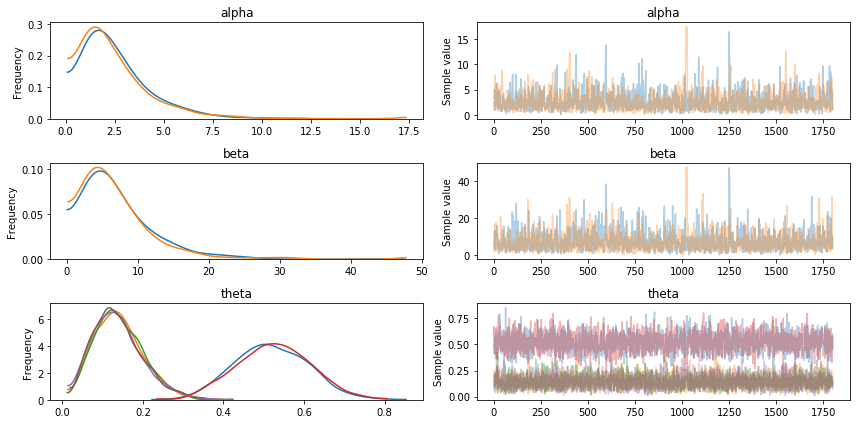

In [78]:
with pm.Model() as model_h:
    alpha = pm.HalfCauchy('alpha', beta=10)
    beta = pm.HalfCauchy('beta', beta=10)
    theta = pm.Beta('theta', alpha, beta, shape= len(N_samples))
    pm.Bernoulli('y', p = theta[group_idx], observed=data)
    trace_j = pm.sample(2000)
chain_t = trace_j[200:]
pm.traceplot(chain_t)

In [79]:
pm.gelman_rubin(chain_t)

{'alpha': 1.0001967662188054,
 'beta': 1.0001491244572194,
 'theta': array([1.00080898, 1.00070092, 1.00127578])}

GridSpec(1, 2, width_ratios=[3, 1])

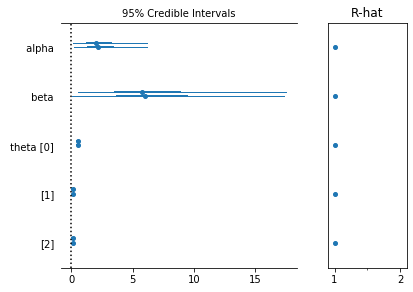

In [80]:
pm.forestplot(chain_t)

In [67]:
# first with (18,18,18)
pm.summary(chain_t)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,22.858811,18.977832,1.171657,1.368316,63.583280,125.765128,1.007590
beta,15.582195,13.381965,0.871123,1.171521,43.064420,108.169596,1.009536
theta__0,0.598596,0.072092,0.001494,0.461658,0.740472,2272.153594,0.999889
theta__1,0.597214,0.070592,0.001537,0.463237,0.742562,1863.080139,0.999799
theta__2,0.598644,0.072025,0.001761,0.465193,0.745292,1621.364502,1.002013


In [74]:
# second with (3,3,3)
pm.summary(chain_t)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,9.259058,9.208541,0.721989,0.187910,30.442758,53.719133,1.001588
beta,75.364760,77.301571,5.868704,3.306090,259.098120,67.267739,1.000030
theta__0,0.111239,0.043465,0.001253,0.033282,0.200039,1264.281910,1.000313
theta__1,0.110439,0.042871,0.001331,0.033471,0.193954,1041.121826,1.000001
theta__2,0.108604,0.041146,0.001312,0.040590,0.195160,951.855599,0.999766


In [81]:
# third with (18,3,3)
pm.summary(chain_t)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,2.631328,1.964745,0.065539,0.200199,6.242611,822.724685,1.000197
beta,7.282970,5.565131,0.173226,0.481923,17.634072,908.433419,1.000149
theta__0,0.522237,0.091048,0.002035,0.344842,0.691355,1999.611009,1.000809
theta__1,0.138929,0.061499,0.001280,0.028804,0.257944,2566.820194,1.000701
theta__2,0.139103,0.059627,0.001265,0.034414,0.255590,2373.272214,1.001276


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e3d72d4a8>,
      dtype=object)

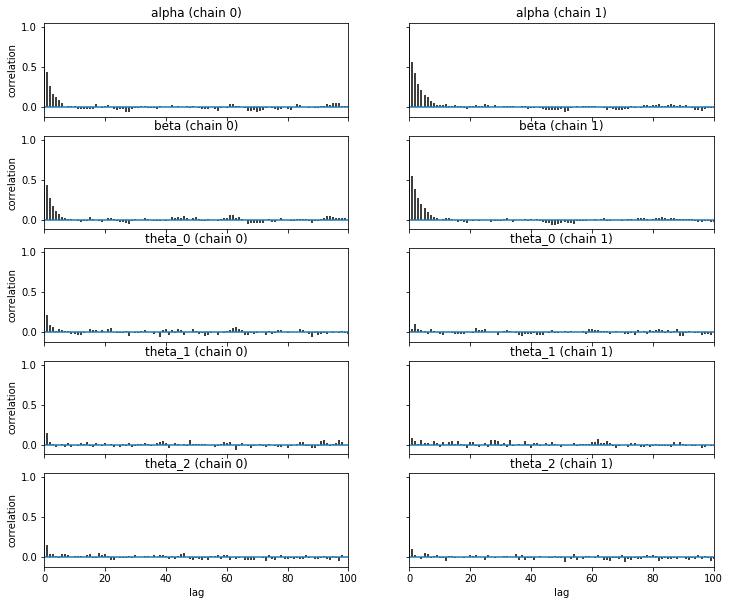

In [82]:
pm.autocorrplot(chain_t)

In [69]:
summary_one = pm.summary(chain_t)

In [76]:
summary_two = pm.summary(chain_t)

In [44]:
summary_three = pm.summary(chain_t)

In [61]:
np.repeat([0,1], (5, 3))

array([0, 0, 0, 0, 0, 1, 1, 1])